In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






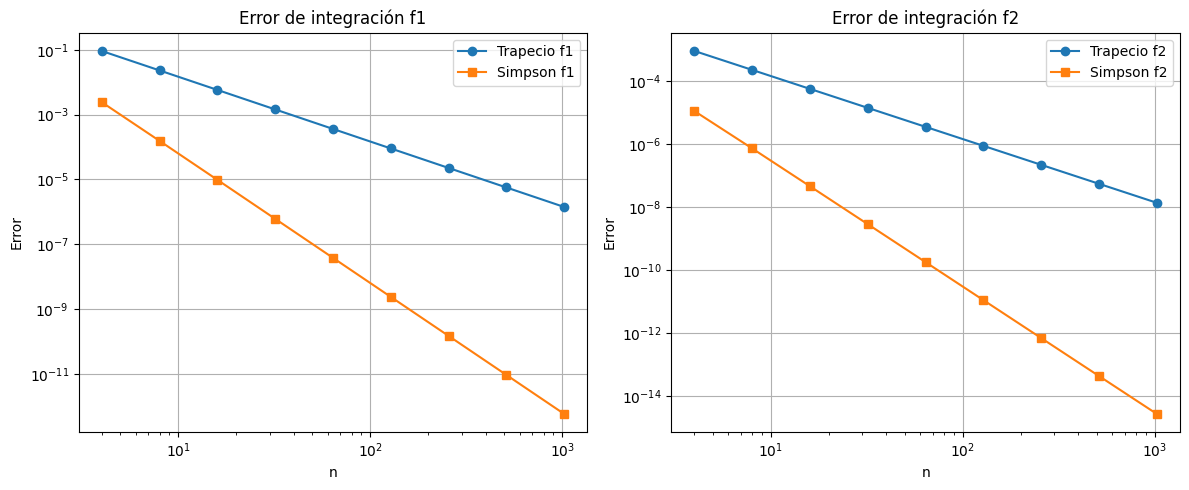

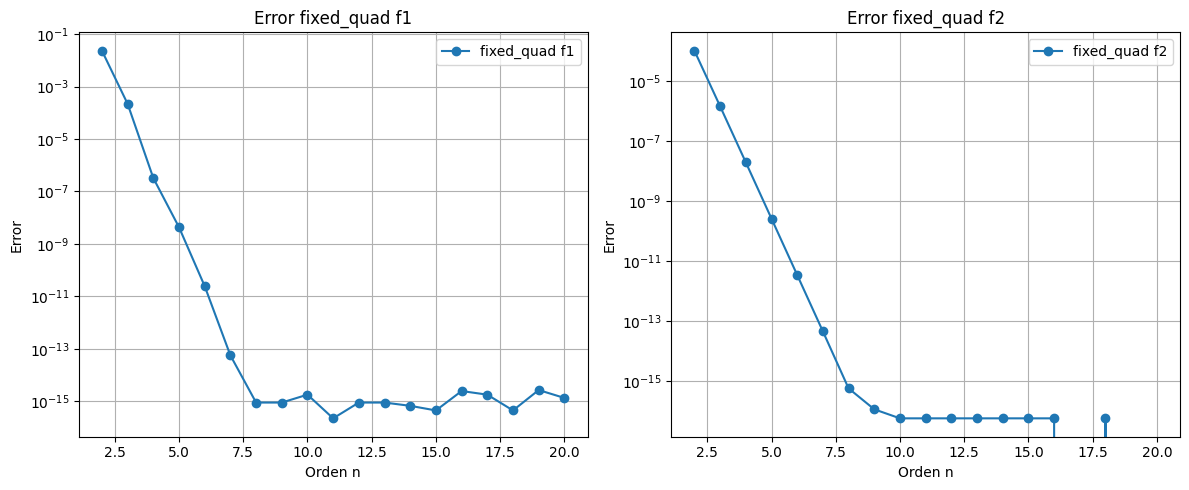

In [2]:
# Funciones a integrar
f1 = lambda x: np.exp(3*x) * np.sin(x)
f2 = lambda x: 1 / (x * np.log(x))

# Intervalos de integración
a1, b1 = 0, np.pi / 4
a2, b2 = np.e, np.e + 1

# Valor exacto con quad
exa1, _ = quad(f1, a1, b1)
exa2, _ = quad(f2, a2, b2)

# Número de subintervalos
ns = np.array([2**i for i in range(2, 11)])
error_trap_1, error_simp_1 = [], []
error_trap_2, error_simp_2 = [], []

for n in ns:
    x1 = np.linspace(a1, b1, n + 1)
    x2 = np.linspace(a2, b2, n + 1)

    y1 = f1(x1)
    y2 = f2(x2)

    trap1 = trapezoid(y1, x1)
    simp1 = simpson(y1, x1)
    trap2 = trapezoid(y2, x2)
    simp2 = simpson(y2, x2)

    error_trap_1.append(abs(trap1 - exa1))
    error_simp_1.append(abs(simp1 - exa1))
    error_trap_2.append(abs(trap2 - exa2))
    error_simp_2.append(abs(simp2 - exa2))

# Gráfica del error en escala log-log
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.loglog(ns, error_trap_1, 'o-', label='Trapecio f1')
plt.loglog(ns, error_simp_1, 's-', label='Simpson f1')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error de integración f1')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(ns, error_trap_2, 'o-', label='Trapecio f2')
plt.loglog(ns, error_simp_2, 's-', label='Simpson f2')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error de integración f2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Estudio de convergencia con fixed_quad
ordenes = np.arange(2, 21)
errors_fixed_1 = []
errors_fixed_2 = []

for n in ordenes:
    approx1, _ = fixed_quad(f1, a1, b1, n=n)
    approx2, _ = fixed_quad(f2, a2, b2, n=n)
    errors_fixed_1.append(abs(approx1 - exa1))
    errors_fixed_2.append(abs(approx2 - exa2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.semilogy(ordenes, errors_fixed_1, 'o-', label='fixed_quad f1')
plt.title('Error fixed_quad f1')
plt.xlabel('Orden n')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(ordenes, errors_fixed_2, 'o-', label='fixed_quad f2')
plt.title('Error fixed_quad f2')
plt.xlabel('Orden n')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [4]:
from scipy.integrate import tplquad

# Definir la función a integrar: f(z, y, x)
def integrand(z, y, x):
    return (1 / y) * np.sin(z / y) if y != 0 else 0

# Límites:
# z va desde 0 hasta x*y
# y va desde 0 hasta x
# x va desde 0 hasta pi

# Usando tplquad
result_tplquad, error_tplquad = tplquad(
    func=integrand,
    a=0, b=np.pi,                          # x from 0 to pi
    gfun=lambda x: 0, hfun=lambda x: x,   # y from 0 to x
    qfun=lambda x, y: 0, rfun=lambda x, y: x * y  # z from 0 to x*y
)

print("Resultado con tplquad:", result_tplquad)
print("Error estimado tplquad:", error_tplquad)

# BONUS: Comparación con integración paso a paso usando quad

# Paso 1: integrar en z
def inner_z(y, x):
    return quad(lambda z: (1 / y) * np.sin(z / y) if y != 0 else 0, 0, x * y)[0]

# Paso 2: integrar en y
def inner_y(x):
    return quad(lambda y: inner_z(y, x), 0, x)[0]

# Paso 3: integrar en x
result_quad, error_quad = quad(inner_y, 0, np.pi)

print("Resultado con quad anidado:", result_quad)
print("Error estimado quad anidado:", error_quad)

# Comparación
print("\nDiferencia absoluta:", abs(result_tplquad - result_quad))

Resultado con tplquad: 6.934802200544679
Error estimado tplquad: 7.699177074265904e-14
Resultado con quad anidado: 6.934802200544679
Error estimado quad anidado: 7.699177074265904e-14

Diferencia absoluta: 0.0


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [5]:
from scipy.special import roots_legendre

def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana de n puntos.

    Parameters:
    - func: La función a integrar.
    - a, b: Límites del intervalo.
    - n: Número de puntos para la cuadratura.

    Returns:
    - Aproximación de la integral.
    """
    # Raíces y pesos de los polinomios de Legendre en [-1, 1]
    x_std, w = roots_legendre(n)

    # Cambio de variable para el intervalo [a, b]
    x_mapped = 0.5 * (b - a) * x_std + 0.5 * (a + b)
    f_evaluated = func(x_mapped)

    integral = 0.5 * (b - a) * np.sum(w * f_evaluated)
    return integral

In [9]:
from scipy.special import roots_legendre

# Definimos la función
def f(z, y, x):
    return np.where(y != 0, (1/y) * np.sin(z / y), 0)

# Integral en z, para un y y x fijos
def integrate_z(y, x, n=20):

    y = np.asarray(y)
    x = np.asarray(x)
    return gauss_quad(lambda z: f(z, y, x), 0, x * y, n)

# Integral en y, para un x fijo
def integrate_y(x, n=20):
    x = np.asarray(x)
    return gauss_quad(lambda y: integrate_z(y, x, n), 0, x, n)

# Integral final en x
def integrate_x(n=20):
    return gauss_quad(lambda x: integrate_y(x, n), 0, np.pi, n)

# Ejecutar
resultado = integrate_x(n=20)
print("Resultado usando gauss_quad:", resultado)

Resultado usando gauss_quad: 9.10733196633681


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [13]:
from scipy.integrate import dblquad
f1 = lambda x: 1 / np.sqrt(np.tan(x))

# Intervalo
a1, b1 = 0, np.pi / 2 - 1e-10  # evitamos exactamente pi/2

# Valor de referencia con `quad`
exact1, _ = quad(f1, a1, b1)

# Trapezoidal
x_trap = np.linspace(a1, b1, 10000)
trap1 = trapezoid(f1(x_trap), x_trap)

# Simpson
x_simp = np.linspace(a1, b1, 10001)  # debe ser impar
simp1 = simpson(f1(x_simp), x_simp)

# Gaussiana
gauss1, _ = fixed_quad(f1, a1, b1, n=40)

print("a) Integral 1:")
print(f"  Quad (exacto):      {exact1:.8f}")
print(f"  Trapezoidal:        {trap1:.8f} (error: {abs(trap1 - exact1):.1e})")
print(f"  Simpson:            {simp1:.8f} (error: {abs(simp1 - exact1):.1e})")
print(f"  Cuadratura Gauss:   {gauss1:.8f} (error: {abs(gauss1 - exact1):.1e})")

a) Integral 1:
  Quad (exacto):      2.22144147
  Trapezoidal:        inf (error: inf)
  Simpson:            inf (error: inf)
  Cuadratura Gauss:   2.19449983 (error: 2.7e-02)


/tmp/ipython-input-13-378430541.py:2: RuntimeWarning: divide by zero encountered in divide
  f1 = lambda x: 1 / np.sqrt(np.tan(x))


In [11]:
f2 = lambda x: np.cos(x) / x**3

# Valor exacto
exact2, _ = quad(f2, 1, np.inf)

# Trapezoidal y Simpson hasta x=1000 (basta por convergencia)
x_vals = np.linspace(1, 1000, 100000)
trap2 = trapezoid(f2(x_vals), x_vals)
simp2 = simpson(f2(x_vals), x_vals)
gauss2, _ = quad(f2, 1, 100)  # Gauss adaptativo

print("\nb) Integral 2:")
print(f"  Quad (exacto):      {exact2:.8f}")
print(f"  Trapezoidal:        {trap2:.8f} (error: {abs(trap2 - exact2):.1e})")
print(f"  Simpson:            {simp2:.8f} (error: {abs(simp2 - exact2):.1e})")
print(f"  Cuadratura Gauss:   {gauss2:.8f} (error: {abs(gauss2 - exact2):.1e})")


b) Integral 2:
  Quad (exacto):      0.01811792
  Trapezoidal:        0.01813810 (error: 2.0e-05)
  Simpson:            0.01811763 (error: 2.9e-07)
  Cuadratura Gauss:   0.01811709 (error: 8.3e-07)


/tmp/ipython-input-11-71944066.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  exact2, _ = quad(f2, 1, np.inf)


In [14]:
# f(y,x) = 1 / sqrt(1 - y^2), con y ∈ [0, sin(x)]
f3 = lambda y, x: 1 / np.sqrt(1 - y**2)

# Usamos dblquad
exact3, _ = dblquad(f3, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x))

print("\nc) Integral 3:")
print(f"  Integral doble con quad: {exact3:.8f}")


c) Integral 3:
  Integral doble con quad: 0.30842514
